## LSTM vs ARIMA

In [ ]:
# Importing the yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-08-30'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(data.tail())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-23  130.179993  133.410004  129.869995  132.369995  132.369995   
2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   

              Volume  
Date                  
2023-08-23  27819700  
2023-08-24  28500700  
2023-08-25  26762900  
2023-08-28  20543300  
2023-08-29  43075600  


In [ ]:
df_close=data.reset_index()['Adj Close']
df_close


0       68.433998
1       68.075996
2       69.890503
3       69.755501
4       70.251999
          ...    
916    132.369995
917    129.779999
918    129.880005
919    131.009995
920    134.570007
Name: Adj Close, Length: 921, dtype: float64

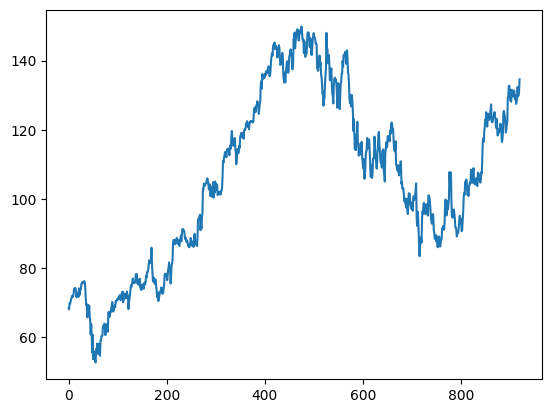

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_close)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----149   150
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3...t+149 and Y=t+150
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1) ## Training the LSTM

Epoch 1/100
10/10 [==============================] - 10s 423ms/step - loss: 0.1956 - val_loss: 0.0318
Epoch 2/100
10/10 [==============================] - 3s 325ms/step - loss: 0.0233 - val_loss: 0.0271
Epoch 3/100
10/10 [==============================] - 3s 282ms/step - loss: 0.0125 - val_loss: 0.0013
Epoch 4/100
10/10 [==============================] - 3s 258ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 5/100
10/10 [==============================] - 3s 254ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 6/100
10/10 [==============================] - 3s 254ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 7/100
10/10 [==============================] - 4s 379ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 8/100
10/10 [==============================] - 3s 252ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 9/100
10/10 [==============================] - 3s 253ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/100
10/10 [==============================] - 3s 250ms/step - loss: 0.0031 - val_l

In [ ]:
l=len(train_data)
x_input=train_data[l-150:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array
y_pred=[]

lst_output=[]
n_steps=150

i=0
while(i<180):

    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        y_pred.append(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        y_pred.append(yhat)
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [1.05365396 1.05404902 1.05443716 1.05481911 1.0551939  1.05556262
 1.05592442 1.05628014 1.05663002 1.05697334 1.05731058 1.05764222
 1.0579679  1.05828786 1.05860221 1.05891109 1.05921412 1.05951226
 1.05980468 1.06009269 1.06037486 1.06065202 1.06092441 1.06119192
 1.06145477 1.06171274 1.06196606 1.06221509 1.06245947 1.06269956
 1.06293488 1.06316614 1.06339359 1.06361675 1.06383574 1.06405067
 1.06426191 1.06446934 1.06467283 1.0648725  1.06506884 1.06526113
 1.06545031 1.06563616 1.06581831 1.065997   1.06617296 1.0663451
 1.06651413 1.06668007 1.06684339 1.06700349 1.06716025 1.06731462
 1.06746578 1.0676142  1.06776011 1.06790328 1.06804359 1.06818116
 1.06831682 1.0684495  1.06857967 1.0687077  1.06883287 1.06895638
 1.0690769  1.06919551 1.06931221 1.06942654 1.06953859 1.06964827
 1.06975639 1.06986225 1.06996596 1.07006812 1.07016802 1.07026649
 1.07036281 1.07045722 1.07055008 1.07064128 1.07073033 1.07081819
 1.0709039  1.07098842 1.07107139 1.07115245 1.0712

In [ ]:
lst_output=scaler.inverse_transform(lst_output)
y_pred = [item for sublist in lst_output for item in sublist]
y_pred

[157.03579861414804,
 157.0380796843797,
 157.04036075461138,
 157.0425723506228,
 157.04477236759752,
 157.04689133131527,
 157.0489871369596,
 157.05107136356722,
 157.05307453691788,
 157.0550429731584,
 157.05698825132552,
 157.05892195045593,
 157.06077459632937,
 157.0626156631661,
 157.0643988348193,
 157.06617042743576,
 157.0678957039054,
 157.06959782230163,
 157.07126520358773,
 157.072886268727,
 157.07447259675612,
 157.07605892478526,
 157.07761051570427,
 157.07911579047644,
 157.0806094862119,
 157.08205686580052,
 157.08346950827902,
 157.0848705717208,
 157.08623689805248,
 157.08758006631072,
 157.08891165553226,
 157.09020850764367,
 157.09148220168166,
 157.09272115860952,
 157.09392537842726,
 157.0951527563184,
 157.0962875019159,
 157.0974454055868,
 157.09856857214757,
 157.09969173870834,
 157.10075701008557,
 157.1018338604995,
 157.1028643947666,
 157.10390650807042,
 157.1049138842641,
 157.10589810238437,
 157.10688232050464,
 157.10780864344136,
 157.1087

In [ ]:
df_close[736:916]

736    100.440002
737     99.480003
738     96.980003
739     94.940002
740     93.709999
          ...    
911    128.699997
912    129.919998
913    127.459999
914    128.369995
915    129.080002
Name: Adj Close, Length: 180, dtype: float64

### Evaluating LSTM

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df_close[736:916],y_pred))

51.03670108877308

In [ ]:
### Calculate MAPE performance metrics
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df_close[736:916],y_pred)

0.47883258615920454

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
training_size=int(len(df_close)*0.80)
test_size=len(df_close)-training_size
print(training_size,test_size)
train_data,test_data=df_close[0:training_size],df_close[training_size:len(df_close)]

736 185


In [ ]:
arima_fit=pm.auto_arima(train_data,error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=False) ## Training ARIMA
arima_fit.summary

<bound method ARIMA.summary of ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)>

In [ ]:
arima_fcast=arima_fit.predict(n_periods=180,return_conf_int=True,alpha=0.05)## predicting

In [ ]:
prediction = pd.DataFrame(arima_fcast[0], columns=['prediction'])

In [ ]:
prediction

,prediction
736,101.037924
737,101.082067
738,101.126509
739,101.170927
740,101.215347
...,...
911,108.811155
912,108.855575
913,108.899995
914,108.944415


### Evaluating ARIMA

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(test_data[:180],prediction))

12.461801960292032

In [ ]:
### Calculate MAPE performance metrics
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_data[:180],prediction)

0.09513942714471303